In [179]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [66]:

## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
    display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

In [2]:
os.chdir('/Users/Yuval/Desktop/Thesis/COVID-19_data/')

In [3]:
da = pd.read_csv('time_series_covid19_confirmed_global.csv')
da = da.loc[da['Country/Region'] == 'Australia']

In [4]:
states = list(da['Province/State'])
case_numbers = []
for state in states:
    da_temp = da.loc[da['Province/State'] == state]
    da_temp = da_temp.iloc[:,4:]
    case_numbers.append(list(da_temp.iloc[0]))

In [5]:
# for c in case_numbers:
#     for i in range(1,len(c)):
#         if c[i-1] > c[i]:
#             print(c[i-1],c[i])

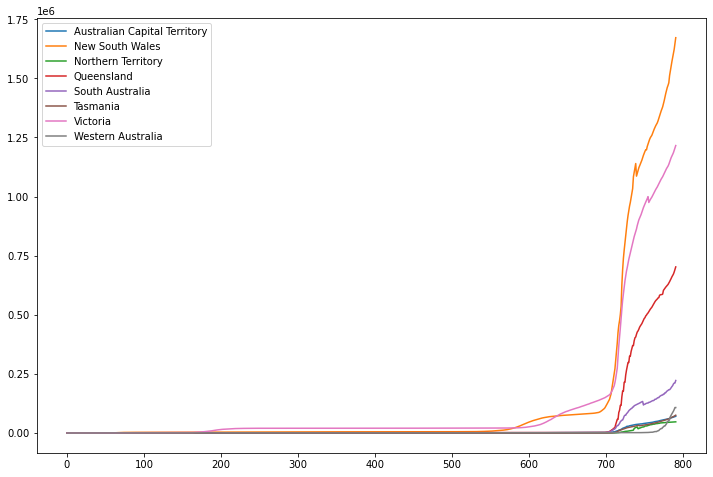

In [6]:
plt.figure(figsize = (12,8))
for c in case_numbers:
    plt.plot(c)
plt.legend(states)

Cool, can remake what Michael did in GetData.jl fairly easily, now let's just look at Adelaide and fit in the compartmental model.

## Adelaide Focus

In [7]:
ad = da.loc[da['Province/State'] == 'South Australia']

In [8]:
ad

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,183191,183191,186743,191573,196308,200353,207490,211176,211753,222149


In [9]:
pd.set_option('display.max_columns', None)

In [10]:
#ad

In [11]:
#list(ad.iloc[0,4:])

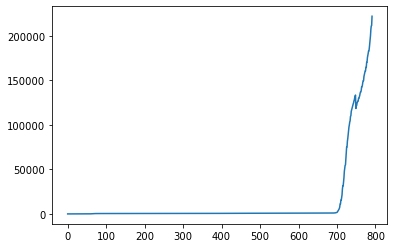

In [12]:
plt.plot(list(ad.iloc[0,4:]))

Or, on a log scale

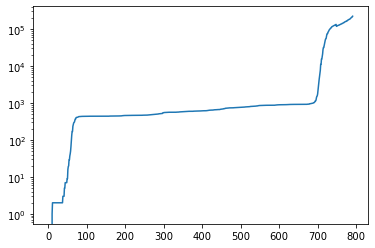

In [13]:
plt.plot(list(ad.iloc[0,4:]))
plt.yscale('log')

Or, focusing on recent outbreak

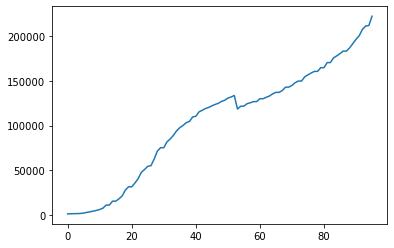

In [14]:
plt.plot(list(ad.iloc[0,700:]))

In [15]:
ad.iloc[0,750:760]

2/6/22     130602
2/7/22     131898
2/8/22     133569
2/9/22     118448
2/10/22    121532
2/11/22    121701
2/12/22    124424
2/13/22    125451
2/14/22    126708
2/15/22    126811
Name: 13, dtype: object

This is what we want to use!

Now import compartmental model, use parameters and fit it on Adelaide.

Omicron reportedly first started in Adelaide on Dec 10th: https://www.sa.gov.au/search?query=omicron&collection=sagov-web-search&x=0&y=0&start_rank=61

Convert the list to number of daily cases

In [16]:
om = ad.iloc[:,691:]
before_om = om.iloc[0,0]
om -= before_om
om

,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22,2/21/22,2/22/22,2/23/22,2/24/22,2/25/22,2/26/22,2/27/22,2/28/22,3/1/22,3/2/22,3/3/22,3/4/22,3/5/22,3/6/22,3/7/22,3/8/22,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,3/15/22,3/16/22,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22
13,0,8,25,38,37,74,98,162,160,233,418,530,571,764,1246,1934,2567,3341,4179,5177,6642,10095,10095,14493,14490,17038,20272,26832,30537,30530,34803,39644,46742,49922,53425,54162,61528,70459,74239,74239,80800,83937,88060,93098,96629,99045,102192,103567,108572,109349,114315,116019,117984,119250,120973,122556,123856,125949,127238,129619,130915,132586,117465,120549,120718,123441,124468,125725,125828,128960,128960,130629,132051,134465,136104,136104,138153,141918,141918,143806,146888,148721,148721,153498,155720,157724,159537,159537,163692,163692,169363,169363,174696,176898,179429,182208,182208,185760,190590,195325,199370,206507,210193,210770,221166


In [17]:
totals = list(om.iloc[0])

daily = []
for i in range(1,len(totals)):
    daily.append(totals[i]-totals[i-1])

In [18]:
SA_health = pd.read_csv('/Users/Yuval/Desktop/Thesis/SA_Health.csv')

In [19]:
sa_total = SA_health.loc[SA_health['Type'] == 'Total']
sa_daily = SA_health.loc[SA_health['Type'] == 'Daily']

In [20]:
om = ad.iloc[:,691:]
before_om = om.iloc[0,0]
om -= before_om
jh = list(om.iloc[0])

In [21]:
om = sa_total.iloc[:,1:]
before_om = om.iloc[0,0]
om -= before_om
saht = list(om.iloc[0])

In [22]:
daily_cases = list(sa_daily.iloc[:,1:].iloc[0])
total_dailys = [0]
for d in daily_cases:
    total_dailys.append(total_dailys[-1] + d)

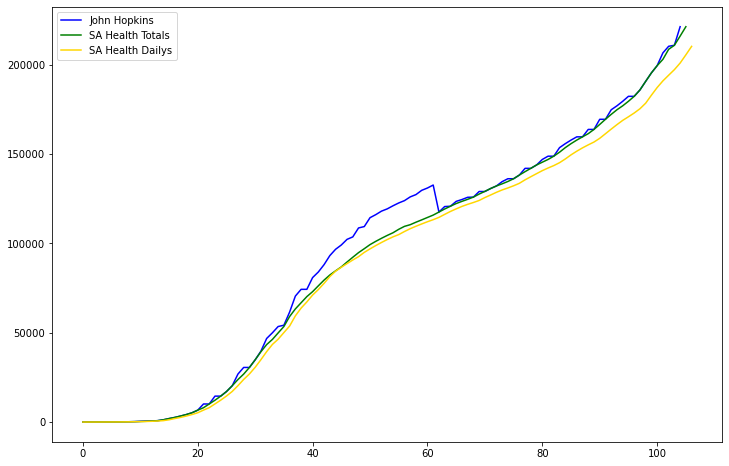

In [23]:
plt.figure(figsize = (12,8))
plt.plot(jh, color = 'blue', label = 'John Hopkins')
plt.plot(saht, color = 'green', label = 'SA Health Totals')
plt.plot(total_dailys, color = 'gold', label = 'SA Health Dailys')
plt.legend()

In [24]:
# Dailys

In [25]:
jh_daily = [0]
for j in range(len(jh)-1):
    jh_daily.append(jh[j+1]-jh[j])

In [26]:
saht_daily = [0]
for j in range(len(saht)-1):
    saht_daily.append(saht[j+1] - saht[j])

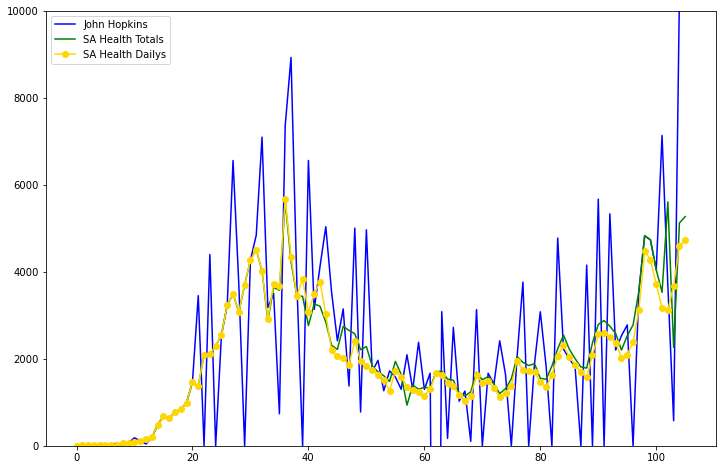

In [27]:
plt.figure(figsize = (12,8))
plt.plot(jh_daily, color = 'blue', label = 'John Hopkins')
plt.plot(saht_daily, color = 'green', label = 'SA Health Totals')
plt.plot(daily_cases,marker = 'o', color = 'gold', label = 'SA Health Dailys')
plt.ylim([0,10000])
plt.legend()

In [28]:
totals = list(om.iloc[0])

daily = []
for i in range(1,len(totals)):
    daily.append(totals[i]-totals[i-1])

In [29]:
# Defne the SER model equatons (note the dvson by populaton as the key dfference from the contnuous case, 
# as well as dong the ncomng/outgong populatons later)
def seir(params,x,popn):
    xdot = list(np.zeros(4))
    xdot[0] = -params[0]*x[0]*x[2]/popn - params[4]*x[0]   
    xdot[1] = params[0]*x[0]*x[2]/popn  - params[1]*x[1]  + params[3]*x[3]*x[2]/popn
    xdot[2] = params[1]*x[1] - params[2]*x[2]
    xdot[3] = params[2]*x[2] + params[4]*x[0] - params[3]*x[3]*x[2]/popn
    
    #infected_daily = params[0]*x[0]*x[2]/popn + params[3]*x[3]*x[2]/popn
    infected_daily = params[1]*x[1]
    return xdot, infected_daily

In [30]:
# The big one
def dynamics(x_init,days,params,steps):
    x = [x_init]
    day_infs = [0]
    
    # Iterate over each day
    for day in range(days):
        #print(day)
        # Step 2: Use the SEIR equation to simulate the spread over the day.
        infected_daily =[]
        for t in range(steps):
            xdot, infs = seir(params, x[-1], popn)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
            infected_daily.append(infs)
        day_infs.append(sum(infected_daily)/steps+day_infs[-1])
        
    return x, day_infs

In [31]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    plt.plot(s[0],'k', label ='Susceptible')
    plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[2],'r', label = 'Infected')
    plt.plot(s[3],'y', label = 'Recovered/Vaccinated')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,steps*days])
    plt.tight_layout()

In [32]:
# Set the initial town values (when doing final simulations make sure this is accurate)
popn = 1771000
x_init = [popn*0.16,0,8,popn*0.84 - 8]

# Set number of days for this simulation
days = 105

# [alpha, beta, gamma, omega, mu]
params = [0.425, 1/5.2, 1/12,0.6*0.5,0.0001]

steps = 10

# Call the function (just once)
y, day_infs = dynamics(x_init,days, params,steps)

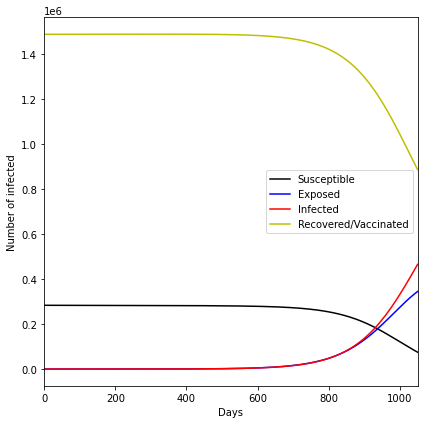

In [33]:
plotting(y)

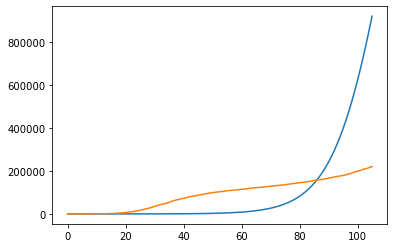

In [34]:
#plotting(y)
plt.plot(day_infs)
plt.plot(list(om.iloc[0]))

Now try and minimise SME and see what happens

In [35]:
cases = list(om.iloc[0])
len(day_infs) ==len(cases)

True

In [36]:
def mean_squared_error(day_infs,cases):
    sme = 0
    try:
        for i in range(len(day_infs)):
            sme += (day_infs[i] - cases[i])**2
        return sme
    except OverflowError:
        return np.inf

In [37]:
alphas = [0.05+0.015*i for i in range(40)]

SME = []
for a in alphas:
    # [alpha, beta, gamma, omega, mu]
    params = [a, 1/5.2, 1/12,0.6*a,0.0001]
    y, day_infs = dynamics(x_init,days, params,steps)
    
    SME.append(mean_squared_error(day_infs,cases))
            

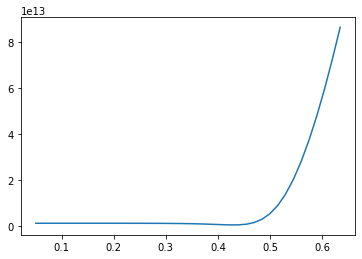

In [38]:
plt.plot(alphas,SME)

In [39]:
SME.index(min(SME))

25

In [40]:
alphas[25]

0.425

Clearly isn't working (look at the plot for alpha 0.5). Going to try seperating the removed and vaccinated compartments

In [41]:
# Defne the SER model equatons (note the dvson by populaton as the key dfference from the contnuous case, 
# as well as dong the ncomng/outgong populatons later)
def seir(params,x,popn):
    xdot = list(np.zeros(5))
    xdot[0] = -params[0]*x[0]*x[2]/popn - params[4]*x[0]   # Susceptible
    xdot[1] = params[0]*x[0]*x[2]/popn  - params[1]*x[1]  + params[3]*x[3]*x[2]/popn # Exposed
    xdot[2] = params[1]*x[1] - params[2]*x[2] # Infected
    xdot[3] = params[4]*x[0] - params[3]*x[3]*x[2]/popn # Vaccinated
    xdot[4] = params[2]*x[2] # Removed
    
    infected_daily = params[1]*x[1]
    return xdot, infected_daily

In [42]:
# The big one
def dynamics(x_init,days,params,steps):
    x = [x_init] #Initial values for all towns!
    day_infs = [0]
    
    # Iterate over each day
    for day in range(days):
        #print(day)
        # Step 2: Use the SEIR equation to simulate the spread over the day.
        infected_daily =[]
        for t in range(steps):
            xdot, infs = seir(params, x[-1], popn)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
            infected_daily.append(infs)
        day_infs.append(sum(infected_daily)/steps+day_infs[-1])
        
    return x, day_infs

In [43]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    #plt.plot(s[0],'k', label ='Susceptible')
    #plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[2],'r', label = 'Infected')
    #plt.plot(s[3],'y', label = 'Vaccinated')
    #plt.plot(s[4],'orange', label = 'Recovered')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,steps*days])
    plt.tight_layout()

In [44]:
# Set the initial town values (when doing final simulations make sure this is accurate)
popn = 1771000
x_init = [popn*0.16,0,8,popn*0.84 - 8,0]

# Set number of days for this simulation
days = 104

# [alpha, beta, gamma, omega, mu]
params = [0.35, 1/5.2, 1/12,0.8*0.4,0]

steps = 10

# Call the function (just once)
y, day_infs = dynamics(x_init,days, params,steps)

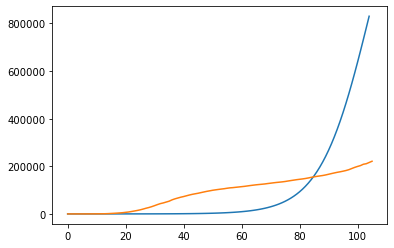

In [45]:
#plotting(y)
plt.plot(day_infs)
plt.plot(list(om.iloc[0]))

Now try and minimise SME and see what happens

In [46]:
cases = list(om.iloc[0])
len(day_infs) == len(cases)

False

In [47]:
def mean_squared_error(day_infs,cases):
    sme = 0
    try:
        for i in range(len(day_infs)):
            sme += (day_infs[i] - cases[i])**2
        return sme
    except OverflowError:
        return np.inf

In [48]:
alphas = [0.05+0.05*i for i in range(40)]

SME = []
for a in alphas:
    # [alpha, beta, gamma, omega, mu]
    params = [a, 1/5.2, 1/12,0.8*a,0]
    y, day_infs = dynamics(x_init,days, params,steps)
    
    SME.append(mean_squared_error(day_infs,cases))
            

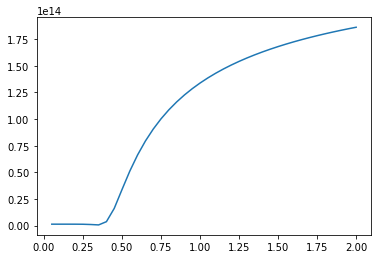

In [49]:
plt.plot(alphas,SME)

In [50]:
SME.index(min(SME))

6

In [51]:
alphas[6]

0.35000000000000003

Next attempt: consider the first 40 days as different from the next days. Find the two optimal alphas based on that.

In [52]:
# Defne the SER model equatons (note the dvson by populaton as the key dfference from the contnuous case, 
# as well as dong the ncomng/outgong populatons later)
def seir(params,x,popn):
    xdot = list(np.zeros(5))
    xdot[0] = -params[0]*x[0]*x[2]/popn - params[4]*x[0]   # Susceptible
    xdot[1] = params[0]*x[0]*x[2]/popn  - params[1]*x[1]  + params[3]*x[3]*x[2]/popn # Exposed
    xdot[2] = params[1]*x[1] - params[2]*x[2] # Infected
    xdot[3] = params[4]*x[0] - params[3]*x[3]*x[2]/popn # Vaccinated
    xdot[4] = params[2]*x[2] # Removed
    
    infected_daily = params[1]*x[1]
    return xdot, infected_daily

In [53]:
# The big one
def dynamics(x_init,days,params,steps,a1,a2,o1,o2):
    x = [x_init] #Initial values for all towns!
    day_infs = [0]
    
    # Iterate over each day
    for day in range(days):
        #Step 1: try the different alphas and omegas.
        
        if day < 40:
            params[0] = a1
            params[3] = o1
        else:
            params[0] = a2
            params[3] = o2
        
        #print(day)
        # Step 2: Use the SEIR equation to simulate the spread over the day.
        infected_daily =[]
        for t in range(steps):
            xdot, infs = seir(params, x[-1], popn)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
            infected_daily.append(infs)
        day_infs.append(sum(infected_daily)/steps+day_infs[-1])
        
    return x, day_infs

In [54]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    #plt.plot(s[0],'k', label ='Susceptible')
    #plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[2],'r', label = 'Infected')
    #plt.plot(s[3],'y', label = 'Vaccinated')
    #plt.plot(s[4],'orange', label = 'Recovered')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,steps*days])
    plt.tight_layout()

In [70]:
# Set the initial town values (when doing final simulations make sure this is accurate)
popn = 1771000
x_init = [popn*0.16,24,8,popn*0.84 - 8,0]

# Set number of days for this simulation
days = 105

a1, a2, o1, o2 = 1.9000000000000001, 0.15000000000000002, 0.4, 0.05
# a1 = 1.5
# o1 = 1.2
# a2 = 0.4
# o2 = 0.3

# [alpha, beta, gamma, omega, mu]
params = [a1, 1/5.2, 1/12,o1,0]

steps = 1

# Call the function (just once)
y, day_infs = dynamics(x_init,days, params,steps,a1,a2,o1,o2)

Text(0.5, 1.0, "Using Adelaide's outbreak to of best fit parameters")

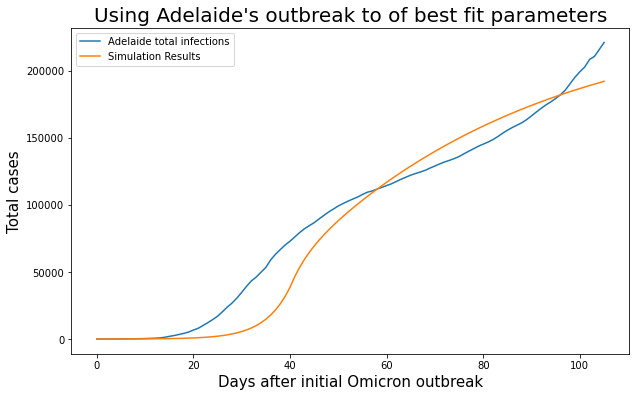

In [71]:
#plotting(y)
plt.figure(figsize = (10,6))
plt.plot(list(om.iloc[0]), label = 'Adelaide total infections')
plt.plot(day_infs, label = 'Simulation Results')
plt.ylabel('Total cases', size = 15)
plt.xlabel('Days after initial Omicron outbreak', size = 15)
plt.legend()
plt.title('Using Adelaide\'s outbreak to of best fit parameters', size =20)

Now try and minimise SME and see what happens

In [62]:
cases = list(om.iloc[0])
len(day_infs) == len(cases)

True

In [63]:
def mean_squared_error(day_infs,cases):
    sme = 0
    try:
        for i in range(len(day_infs)):
            sme += (day_infs[i] - cases[i])**2
        return sme
    except OverflowError:
        return np.inf

In [64]:
alphas1 = [0.05+0.05*i for i in range(40)]
alphas2 = [0.05+0.05*i for i in range(40)]
omegas1 = [0.05+0.05*i for i in range(40)]
omegas2 = [0.05+0.05*i for i in range(40)]

SME = []
for a1 in alphas1:
    print(a1)
    for a2 in alphas2:
        for o1 in omegas1:
            if o1 < a1:
                for o2 in omegas2:
                    if o2 < a2:
                        # [alpha, beta, gamma, omega, mu]
                        params = [a1, 1/5.2, 1/12,o1,0]
                        y, day_infs = dynamics(x_init,days,params,steps,a1,a2,o1,o2)

                        SME.append([(a1,a2,o1,o2),mean_squared_error(day_infs,cases)])
            

0.05
0.1
0.15000000000000002
0.2
0.25
0.3
0.35000000000000003
0.4
0.45
0.5
0.55
0.6000000000000001
0.6500000000000001
0.7000000000000001
0.7500000000000001
0.8
0.8500000000000001
0.9000000000000001
0.9500000000000001
1.0
1.05
1.1
1.1500000000000001
1.2000000000000002
1.2500000000000002
1.3
1.35
1.4000000000000001
1.4500000000000002
1.5000000000000002
1.55
1.6
1.6500000000000001
1.7000000000000002
1.7500000000000002
1.8
1.85
1.9000000000000001
1.9500000000000002
2.0


In [67]:
allDone()

In [68]:
scores = list(zip(*SME))[1]
scores.index(min(scores))

519531

In [69]:
SME[519531]

[(1.9000000000000001, 0.15000000000000002, 0.4, 0.05), 28099567554.3295]

More improvements- change parameters to more closely reflect omicron.

https://www.medrxiv.org/content/10.1101/2022.01.04.22268721v1.full.pdf - this paper claims that latent period is 3 days and infectious period only 2.5 (ie maybe amount of time until they're removed from the population?)

This website https://www1.racgp.org.au/newsgp/clinical/how-does-omicron-compare-with-delta#:~:text=The%20incubation%20period%20of%20Omicron,or%20two%20before%20symptoms%20emerge also claims it's around 3 days, but not sure how solid of a reference it is. It also says the recovery time is around 5 days.

In [72]:
# Defne the SER model equatons (note the dvson by populaton as the key dfference from the contnuous case, 
# as well as dong the ncomng/outgong populatons later)
def seir(params,x,popn):
    xdot = list(np.zeros(5))
    xdot[0] = -params[0]*x[0]*x[2]/popn - params[4]*x[0]   # Susceptible
    xdot[1] = params[0]*x[0]*x[2]/popn  - params[1]*x[1]  + params[3]*x[3]*x[2]/popn # Exposed
    xdot[2] = params[1]*x[1] - params[2]*x[2] # Infected
    xdot[3] = params[4]*x[0] - params[3]*x[3]*x[2]/popn # Vaccinated
    xdot[4] = params[2]*x[2] # Removed
    
    infected_daily = params[1]*x[1]
    return xdot, infected_daily

In [73]:
# The big one
def dynamics(x_init,days,params,steps,a1,a2,o1,o2):
    x = [x_init] #Initial values for all towns!
    day_infs = [0]
    
    # Iterate over each day
    for day in range(days):
        #Step 1: try the different alphas and omegas.
        
        if day < 35:
            params[0] = a1
            params[3] = o1
        else:
            params[0] = a2
            params[3] = o2
        
        #print(day)
        # Step 2: Use the SEIR equation to simulate the spread over the day.
        infected_daily =[]
        for t in range(steps):
            xdot, infs = seir(params, x[-1], popn)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
            infected_daily.append(infs)
        day_infs.append(sum(infected_daily)/steps+day_infs[-1])
        
    return x, day_infs

In [74]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    #plt.plot(s[0],'k', label ='Susceptible')
    #plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[2],'r', label = 'Infected')
    #plt.plot(s[3],'y', label = 'Vaccinated')
    #plt.plot(s[4],'orange', label = 'Recovered')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,steps*days])
    plt.tight_layout()

In [83]:
# Set the initial town values (when doing final simulations make sure this is accurate)
popn = 1771000
x_init = [popn*0.16,50,8,popn*0.84 - 8,0]

# Set number of days for this simulation
days = 105

a1, a2, o1, o2 = 3.05, 0.45, 0.55, 0.35000000000000003
# a1 = 1.5
# o1 = 1.2
# a2 = 0.4
# o2 = 0.3

# [alpha, beta, gamma, omega, mu]
params = [a1, 1/3, 1/2.5,o1,0]

steps = 1

# Call the function (just once)
y, day_infs = dynamics(x_init,days, params,steps,a1,a2,o1,o2)

Text(0.5, 1.0, "Using Adelaide's outbreak to of best fit parameters")

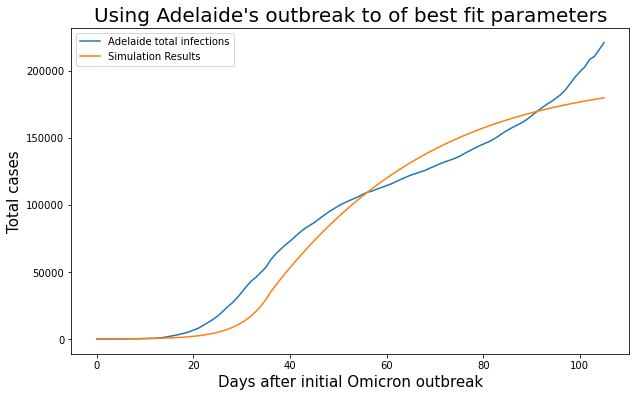

In [84]:
#plotting(y)
plt.figure(figsize = (10,6))
plt.plot(list(om.iloc[0]), label = 'Adelaide total infections')
plt.plot(day_infs, label = 'Simulation Results')
plt.ylabel('Total cases', size = 15)
plt.xlabel('Days after initial Omicron outbreak', size = 15)
plt.legend()
plt.title('Using Adelaide\'s outbreak to of best fit parameters', size =20)

Now try and minimise SME and see what happens

In [77]:
cases = list(om.iloc[0])
len(day_infs) == len(cases)

True

In [78]:
def mean_squared_error(day_infs,cases):
    sme = 0
    try:
        for i in range(len(day_infs)):
            sme += (day_infs[i] - cases[i])**2
        return sme
    except OverflowError:
        return np.inf

In [79]:
alphas1 = [0.05+0.1*i for i in range(40)]
alphas2 = [0.05+0.1*i for i in range(40)]
omegas1 = [0.05+0.1*i for i in range(40)]
omegas2 = [0.05+0.1*i for i in range(40)]

SME = []
for a1 in alphas1:
    print(a1)
    for a2 in alphas2:
        for o1 in omegas1:
            if o1 < a1:
                for o2 in omegas2:
                    if o2 < a2:
                        # [alpha, beta, gamma, omega, mu]
                        params = [a1, 1/3, 1/2.5,o1,0]
                        y, day_infs = dynamics(x_init,days,params,steps,a1,a2,o1,o2)

                        SME.append([(a1,a2,o1,o2),mean_squared_error(day_infs,cases)])
            

0.05
0.15000000000000002
0.25
0.35000000000000003
0.45
0.55
0.6500000000000001
0.7500000000000001
0.8500000000000001
0.9500000000000001
1.05
1.1500000000000001
1.2500000000000002
1.35
1.4500000000000002
1.55
1.6500000000000001
1.7500000000000002
1.85
1.9500000000000002
2.05
2.15
2.25
2.35
2.45
2.55
2.65
2.75
2.85
2.95
3.05
3.15
3.25
3.35
3.45
3.55
3.65
3.75
3.85
3.95


In [80]:
scores = list(zip(*SME))[1]
scores.index(min(scores))

339503

In [81]:
allDone()

In [82]:
SME[339503]

[(3.05, 0.45, 0.55, 0.35000000000000003), 20289090525.340492]

More improvements- look at what the actual day that there seemed to be an increase in restrictions and use that as the piecewise day. Maybe also try not to fit the first 10 days, and run it again with greater granularity of parameters?

## Adding a Vaccinated Compartment for each dose

In [85]:
sa_vacc = pd.read_csv('/Users/Yuval/Desktop/Thesis/SA_Health_modified.csv')
# South Australia's population is 1.77 million
# 86% of the population is over the age of 12 = 1.5222 million
# 81.3% of the population is over the age of 16 = 1.4337 million
# Hence convert these percentages to numbers of people
sa_vacc.loc[sa_vacc['Type'] == 'First Dose (12+)'] = ['First Dose (12+)'] + list(round(sa_vacc.loc[sa_vacc['Type'] == 'First Dose (12+)'].iloc[:,1:]*1522200/100).iloc[0])
sa_vacc.loc[sa_vacc['Type'] == 'Second Dose (12+)'] = ['Second Dose (12+)'] + list(round(sa_vacc.loc[sa_vacc['Type'] == 'Second Dose (12+)'].iloc[:,1:]*1522200/100).iloc[0])
sa_vacc.loc[sa_vacc['Type'] == 'Third Dose (16+)'] = ['Third Dose (16+)'] + list(round(sa_vacc.loc[sa_vacc['Type'] == 'Third Dose (16+)'].iloc[:,1:]*1433700/100).iloc[0])


In [86]:
sa_vacc

,Type,9/12/2021,10/12/2021,11/12/2021,12/12/2021,13/12/2021,14/12/2021,15/12/2021,16/12/2021,17/12/2021,18/12/2021,19/12/2021,20/12/2021,21/12/2021,22/12/2021,23/12/2021,24/12/2021,25/12/2021,26/12/2021,27/12/2021,28/12/2021,29/12/2021,30/12/2021,31/12/2021,1/1/2022,2/1/2022,3/1/2022,4/1/2022,5/1/2022,6/1/2022,7/1/2022,8/1/2022,9/1/2022,10/1/2022,11/1/2022,12/1/2022,13/1/2022,14/1/2022,15/1/2022,16/1/2022,17/1/2022,18/1/2022,19/1/2022,20/1/2022,21/1/2022,22/1/2022,23/1/2022,24/1/2022,25/1/2022,26/1/2022,27/1/2022,28/1/2022,29/1/2022,30/1/2022,31/1/2022,1/2/2022,2/2/2022,3/2/2022,4/2/2022,5/2/2022,6/2/2022,7/2/2022,8/2/2022,9/2/2022,10/2/2022,11/2/2022,12/2/2022,13/2/2022,14/2/2022,15/2/2022,16/2/2022,17/2/2022,18/2/2022,19/2/2022,20/2/2022,21/2/2022,22/2/2022,23/2/2022,24/2/2022,25/2/2022,26/2/2022,27/2/2022,28/2/2022,1/3/2022,2/3/2022,3/3/2022,4/3/2022,5/3/2022,6/3/2022,7/3/2022,8/3/2022,9/3/2022,10/3/2022,11/3/2022,12/3/2022,13/3/2022,14/3/2022,15/3/2022,16/3/2022,17/3/2022,18/3/2022,19/3/2022,20/3/2022,21/3/2022,22/3/2022,23/3/2022,24/3/2022
0,Total,983.0,991.0,998.0,1008.0,1020.0,1031.0,1057.0,1081.0,1143.0,1216.0,1296.0,1400.0,1554.0,1747.0,2229.0,2917.0,3550.0,4324.0,5162.0,6160.0,7625.0,8993.0,11078.0,13178.0,15473.0,18021.0,21255.0,24745.0,27813.0,31513.0,35786.0,40294.0,44313.0,47190.0,50830.0,54408.0,60027.0,64266.0,67716.0,71153.0,73918.0,77183.0,80392.0,83237.0,85549.0,87765.0,90512.0,93165.0,95742.0,97953.0,100234.0,102069.0,103770.0,105382.0,106862.0,108804.0,110446.0,111380.0,112774.0,114076.0,115419.0,116752.0,118448.0,120167.0,121701.0,123208.0,124424.0,125570.0,126811.0,128503.0,130020.0,131612.0,133034.0,134236.0,135548.0,137087.0,139136.0,141055.0,142901.0,144789.0,146341.0,147871.0,149704.0,151934.0,154481.0,156703.0,158707.0,160520.0,162307.0,164675.0,167466.0,170346.0,173096.0,175679.0,177881.0,180412.0,183191.0,186743.0,191573.0,196308.0,200353.0,203881.0,209490.0,211753.0,216878.0,222149.0
1,Daily,0.0,8.0,7.0,10.0,13.0,12.0,25.0,24.0,64.0,73.0,80.0,105.0,154.0,198.0,484.0,688.0,634.0,774.0,842.0,995.0,1472.0,1374.0,2093.0,2108.0,2298.0,2552.0,3246.0,3493.0,3070.0,3707.0,4274.0,4506.0,4024.0,2921.0,3715.0,3669.0,5679.0,4349.0,3450.0,3829.0,3079.0,3482.0,3777.0,3023.0,2193.0,2062.0,2009.0,1869.0,2401.0,1953.0,1846.0,1740.0,1633.0,1505.0,1266.0,1723.0,1583.0,1363.0,1289.0,1234.0,1147.0,1296.0,1671.0,1639.0,1445.0,1372.0,1165.0,1027.0,1138.0,1624.0,1440.0,1479.0,1336.0,1118.0,1217.0,1378.0,1958.0,1735.0,1714.0,1688.0,1467.0,1358.0,1618.0,2075.0,2307.0,2047.0,1861.0,1688.0,1577.0,2089.0,2560.0,2590.0,2503.0,2374.0,2023.0,2099.0,2380.0,3122.0,4474.0,4274.0,3724.0,3168.0,3121.0,3686.0,4594.0,4742.0
2,First Dose (12+),1380635.0,1383680.0,1385202.0,1386724.0,1386724.0,1388246.0,1391291.0,1392813.0,1394335.0,1395857.0,1395857.0,1397380.0,1400424.0,1401946.0,1403468.0,1403468.0,1403468.0,1403468.0,1403468.0,1403468.0,1404991.0,1403468.0,1406513.0,1408035.0,1409557.0,1409557.0,1409557.0,1409557.0,1411079.0,1412602.0,1414124.0,1414124.0,1415646.0,1417168.0,1417168.0,1418690.0,1420213.0,1421735.0,1421735.0,1421735.0,1423257.0,1424779.0,1426301.0,1427824.0,1427824.0,1429346.0,1429346.0,1430868.0,1430868.0,1430868.0,1432390.0,1432390.0,1432390.0,1433912.0,1433912.0,1435435.0,1438479.0,1440001.0,1440001.0,1440001.0,1440001.0,1441523.0,1441523.0,1441523.0,1443046.0,1443046.0,1443046.0,1443046.0,1443046.0,1444568.0,1446090.0,1446090.0,1446090.0,1446090.0,1447612.0,1447612.0,1449134.0,1438479.0,1438479.0,1438479.0,1438479.0,1440001.0,1440001.0,1441523.0,1441523.0,1441523.0,1443046.0,1443046.0,1443046.0,1443046.0,1443046.0,1443046.0,1443046.0,1444568.0,1444568.0,1444568.0,1444568.0,1444568.0,1446090.0,1446090.0,1446090.0,1446090.0,1446090.0,1446090.0,1447612.0,1447612.0
3,Second Dose (12+),1264948.0,1271037.0,1275604.0,1278648.0,1281692.0,1286259.0,1292348.0,1298437.0,1303003.0,1307570.0,1310614.0,1313659.0,1315181.0,1319747.0,1322792.0,1328881.0,1328881.0,1330403.0,1330403.0,1331925.0,1331925.0,1328881.0,1336492.0,1338014

In [87]:
first = list(sa_vacc.loc[sa_vacc['Type'] == 'First Dose (12+)'].iloc[0])[1:]
first_change = []
for f in range(len(first)-1):
    first_change.append(first[f+1] - first[f])

second = list(sa_vacc.loc[sa_vacc['Type'] == 'Second Dose (12+)'].iloc[0])[1:]
second_change = []
for f in range(len(second)-1):
    second_change.append(second[f+1] - second[f])

third = list(sa_vacc.loc[sa_vacc['Type'] == 'Third Dose (16+)'].iloc[0])[1:]
third_change = []
for f in range(len(third)-1):
    third_change.append(third[f+1] - third[f])

uptakes = [first_change, second_change, third_change]


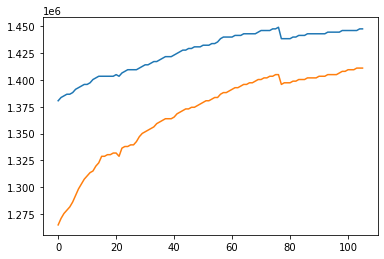

In [88]:
plt.plot(list(sa_vacc.iloc[2,1:]))
plt.plot(list(sa_vacc.iloc[3,1:]))
#plt.plot(sa_vacc.iloc[4,1:])

In [101]:
def sveir(params,x,popn,changes, effic):
    xdot = list(np.zeros(7))
    eff1, eff2, eff3 = effic[0], effic[1], effic[2]
    xdot[0] = -params[0]*x[0]*x[5]/popn - changes[0] # Susceptible
    xdot[1] = -eff1*params[0]*x[1]*x[5]/popn +changes[0] - changes[1]  # First dose
    xdot[2] = -eff2*params[0]*x[2]*x[5]/popn + changes[1] -changes[2] # Second dose
    xdot[3] = -eff3*params[0]*x[3]*x[5]/popn + changes[2]  # Third dose
    xdot[4] = params[0]*x[0]*x[5]/popn + eff1*params[0]*x[1]*x[5]/popn + eff2*params[0]*x[2]*x[5]/popn + eff3*params[0]*x[3]*x[5]/popn - params[1]*x[4] # Exposed
    xdot[5] = params[1]*x[4] - params[2]*x[5] # Infected
    xdot[6] = params[2]*x[5] # Removed
    
    infected_daily = params[1]*x[4]
    return xdot, infected_daily

In [102]:
# The big one
def dynamics(x_init,days,params,steps,a1,a2,uptakes, effic):
    x = [x_init] #Initial values for all towns!
    day_infs = [0]
    
    # Iterate over each day
    for day in range(days):
        #Step 1: try the different alphas and omegas.
        
        if day < 40:
            params[0] = a1
        else:
            params[0] = a2
            
        changes = [uptakes[0][day],uptakes[1][day], uptakes[2][day]]
        
        #print(day)
        # Step 2: Use the SEIR equation to simulate the spread over the day.
        infected_daily =[]
        for t in range(steps):
            xdot, infs = sveir(params, x[-1], popn,changes,effic)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
            infected_daily.append(infs)
        day_infs.append(sum(infected_daily)/steps+day_infs[-1])
        
    return x, day_infs

In [103]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    #plt.plot(s[0],'k', label ='Susceptible')
    #plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[5],'r', label = 'Infected')
    #plt.plot(s[3],'y', label = 'Vaccinated')
    #plt.plot(s[4],'orange', label = 'Recovered')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,steps*days])
    plt.tight_layout()

In [111]:
effic = [1-0.293, 1-0.128, 1-0.58]
# Set the initial town values (when doing final simulations make sure this is accurate)
popn = 1770000
x_init = [1770000-(1380635+32+8),1380635-1264948,1264948-38710,38710,32,8,0]

# Set number of days for this simulation
days = 105

a1, a2= 1.05, 0.35

# [alpha, beta, gamma]
params = [a1, 1/3, 1/2.5]

steps = 10

# Call the function (just once)
y, day_infs = dynamics(x_init,days, params,steps,a1,a2,uptakes,effic)

Text(0.5, 1.0, "Using Adelaide's outbreak to of best fit parameters")

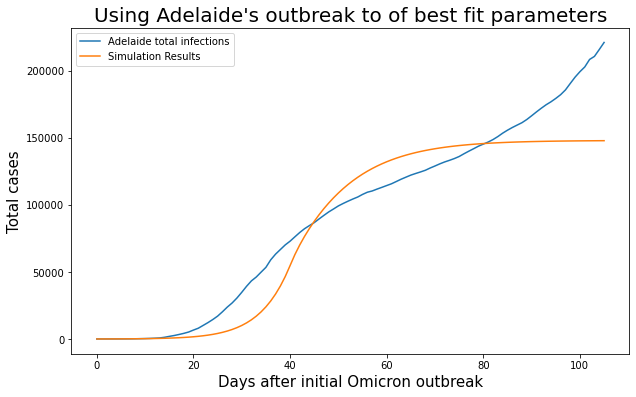

In [112]:
#plotting(y)
plt.figure(figsize = (10,6))
plt.plot(saht, label = 'Adelaide total infections')
plt.plot(day_infs, label = 'Simulation Results')
plt.ylabel('Total cases', size = 15)
plt.xlabel('Days after initial Omicron outbreak', size = 15)
plt.legend()
plt.title('Using Adelaide\'s outbreak to of best fit parameters', size =20)

In [106]:
cases = saht
len(day_infs) == len(saht)

True

In [107]:
def mean_squared_error(day_infs,cases):
    sme = 0
    try:
        for i in range(len(day_infs)):
            sme += (day_infs[i] - cases[i])**2
        return sme
    except OverflowError:
        return np.inf

In [108]:
alphas1 = [0.05+0.1*i for i in range(40)]
alphas2 = [0.05+0.1*i for i in range(40)]


SME = []
for a1 in alphas1:
    print(a1)
    for a2 in alphas2:
        # [alpha, beta, gamma]
        params = [a1, 1/3, 1/2.5]
        y, day_infs = dynamics(x_init,days, params,steps,a1,a2,uptakes,effic)

        SME.append([(a1,a2),mean_squared_error(day_infs,cases)])
            

0.05
0.15000000000000002
0.25
0.35000000000000003
0.45
0.55
0.6500000000000001
0.7500000000000001
0.8500000000000001
0.9500000000000001
1.05
1.1500000000000001
1.2500000000000002
1.35
1.4500000000000002
1.55
1.6500000000000001
1.7500000000000002
1.85
1.9500000000000002
2.05
2.15
2.25
2.35
2.45
2.55
2.65
2.75
2.85
2.95
3.05
3.15
3.25
3.35
3.45
3.55
3.65
3.75
3.85
3.95


In [109]:
scores = list(zip(*SME))[1]
scores.index(min(scores))

403

In [110]:
SME[403]

[(1.05, 0.35000000000000003), 51277416788.37152]

#### Some more key changes:
* Add another step at the 80 day mark (for the BA2 strain)
* Add a fitting for the latent period

In [185]:
def sveir(params,x,popn,changes, effic):
    xdot = list(np.zeros(7))
    eff1, eff2, eff3 = effic[0], effic[1], effic[2]
    xdot[0] = -params[0]*x[0]*x[5]/popn - changes[0] # Susceptible
    xdot[1] = -eff1*params[0]*x[1]*x[5]/popn +changes[0] - changes[1]  # First dose
    xdot[2] = -eff2*params[0]*x[2]*x[5]/popn + changes[1] -changes[2] # Second dose
    xdot[3] = -eff3*params[0]*x[3]*x[5]/popn + changes[2]  # Third dose
    xdot[4] = params[0]*x[0]*x[5]/popn + eff1*params[0]*x[1]*x[5]/popn + eff2*params[0]*x[2]*x[5]/popn + eff3*params[0]*x[3]*x[5]/popn - params[1]*x[4] # Exposed
    xdot[5] = params[1]*x[4] - params[2]*x[5] # Infected
    xdot[6] = params[2]*x[5] # Removed
    
    infected_daily = params[1]*x[4]
    return xdot, infected_daily

In [186]:
# The big one
def dynamics(x_init,days,params,steps,a1,a2,a3,uptakes, effic):
    x = [x_init] #Initial values for all towns!
    day_infs = [0]
    
    # Iterate over each day
    for day in range(days):
        #Step 1: try the different alphas and omegas.
        
        if day < 40:
            params[0] = a1
        elif day>40 & day < 80:
            params[0] = a2
        else:
            params[0] = a3
            
        changes = [uptakes[0][day],uptakes[1][day], uptakes[2][day]]
        
        #print(day)
        # Step 2: Use the SEIR equation to simulate the spread over the day.
        infected_daily =[]
        for t in range(steps):
            xdot, infs = sveir(params, x[-1], popn,changes,effic)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
            infected_daily.append(infs)
        day_infs.append(sum(infected_daily)/steps+day_infs[-1])
        
    return x, day_infs

In [187]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    #plt.plot(s[0],'k', label ='Susceptible')
    #plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[5],'r', label = 'Infected')
    #plt.plot(s[3],'y', label = 'Vaccinated')
    #plt.plot(s[4],'orange', label = 'Recovered')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,steps*days])
    plt.tight_layout()

In [196]:
effic = [1-0.293, 1-0.128, 1-0.58]
# Set the initial town values (when doing final simulations make sure this is accurate)
popn = 1770000
x_init = [1770000-(1380635+32+8),1380635-1264948,1264948-38710,38710,32,8,0]

# Set number of days for this simulation
days = 105

a1, a2, a3,L,D= 1.05, 0.85, 0.3, 1.0, 2.6

# [alpha, beta, gamma]
params = [a1, 1/L, 1/(D-L)]

steps = 10

# Call the function (just once)
y, day_infs = dynamics(x_init,days, params,steps,a1,a2,a3,uptakes,effic)

Text(0.5, 1.0, "Using Adelaide's outbreak to of best fit parameters")

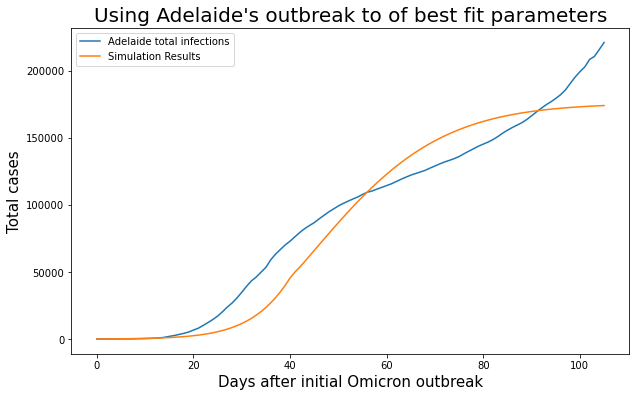

In [197]:
#plotting(y)
plt.figure(figsize = (10,6))
plt.plot(saht, label = 'Adelaide total infections')
plt.plot(day_infs, label = 'Simulation Results')
plt.ylabel('Total cases', size = 15)
plt.xlabel('Days after initial Omicron outbreak', size = 15)
plt.legend()
plt.title('Using Adelaide\'s outbreak to of best fit parameters', size =20)

In [190]:
cases = saht
len(day_infs) == len(saht)

True

In [191]:
def mean_squared_error(day_infs,cases):
    sme = 0
    try:
        for i in range(len(day_infs)):
            sme += (day_infs[i] - cases[i])**2
        return sme
    except OverflowError:
        return np.inf

In [192]:
alphas1 = [0.95+0.05*i for i in range(10)]
alphas2 = [0.6+0.05*i for i in range(10)]
alphas3 = [0.3+0.05*i for i in range(10)]
latents = [1+0.1*i for i in range(10)]
infectious = [2.5 +0.1*i for i in range(10)]

SME = []
for a1 in alphas1:
    print(a1)
    for a2 in alphas2:
        for a3 in alphas3:
        # [alpha, beta, gamma]
            for L in latents:
                for D in infectious:
                    if D > L:
                        params = [a1, 1/L, 1/(D-L)]
                        y, day_infs = dynamics(x_init,days, params,steps,a1,a2,a3,uptakes,effic)

                        SME.append([(a1,a2,a3,L,D),mean_squared_error(day_infs,cases)])


0.95
1.0
1.05
1.1
1.15
1.2
1.25
1.3
1.35
1.4


In [193]:
allDone()

In [194]:
scores = list(zip(*SME))[1]
scores.index(min(scores))

25001

In [195]:
SME[25001]

[(1.05, 0.85, 0.3, 1.0, 2.6), 32034347678.325462]

## Fitting on the log scale

In [198]:
def sveir(params,x,popn,changes, effic):
    xdot = list(np.zeros(7))
    eff1, eff2, eff3 = effic[0], effic[1], effic[2]
    xdot[0] = -params[0]*x[0]*x[5]/popn - changes[0] # Susceptible
    xdot[1] = -eff1*params[0]*x[1]*x[5]/popn +changes[0] - changes[1]  # First dose
    xdot[2] = -eff2*params[0]*x[2]*x[5]/popn + changes[1] -changes[2] # Second dose
    xdot[3] = -eff3*params[0]*x[3]*x[5]/popn + changes[2]  # Third dose
    xdot[4] = params[0]*x[0]*x[5]/popn + eff1*params[0]*x[1]*x[5]/popn + eff2*params[0]*x[2]*x[5]/popn + eff3*params[0]*x[3]*x[5]/popn - params[1]*x[4] # Exposed
    xdot[5] = params[1]*x[4] - params[2]*x[5] # Infected
    xdot[6] = params[2]*x[5] # Removed
    
    infected_daily = params[1]*x[4]
    return xdot, infected_daily

In [199]:
# The big one
def dynamics(x_init,days,params,steps,a1,a2,a3,uptakes, effic):
    x = [x_init] #Initial values for all towns!
    day_infs = [0]
    
    # Iterate over each day
    for day in range(days):
        #Step 1: try the different alphas and omegas.
        
        if day < 40:
            params[0] = a1
        elif day>40 & day < 80:
            params[0] = a2
        else:
            params[0] = a3
            
        changes = [uptakes[0][day],uptakes[1][day], uptakes[2][day]]
        
        #print(day)
        # Step 2: Use the SEIR equation to simulate the spread over the day.
        infected_daily =[]
        for t in range(steps):
            xdot, infs = sveir(params, x[-1], popn,changes,effic)
            xdot = [i/steps for i in xdot]
            x.append([sum(i) for i in zip(*[x[-1],xdot])])
            infected_daily.append(infs)
        day_infs.append(sum(infected_daily)/steps+day_infs[-1])
        
    return x, day_infs

In [200]:
def plotting(y):
    s = list(zip(*y))
    plt.figure(figsize = (6,6))
    #plt.plot(s[0],'k', label ='Susceptible')
    #plt.plot(s[1],'b', label = 'Exposed')
    plt.plot(s[5],'r', label = 'Infected')
    #plt.plot(s[3],'y', label = 'Vaccinated')
    #plt.plot(s[4],'orange', label = 'Recovered')
    plt.legend()
    plt.xlabel("Days")
    plt.ylabel("Number of infected")
    plt.xlim([0,steps*days])
    plt.tight_layout()

In [219]:
effic = [1-0.293, 1-0.128, 1-0.58]
# Set the initial town values (when doing final simulations make sure this is accurate)
popn = 1770000
x_init = [1770000-(1380635+32+8),1380635-1264948,1264948-38710,38710,32,8,0]

# Set number of days for this simulation
days = 105

a1, a2,a3, L, D = 3.1999999999999997, 0.01, 0.01, 2.5, 3.1

# [alpha, beta, gamma]
params = [a1, 1/L, 1/(D-L)]

steps = 5

# Call the function (just once)
y, day_infs = dynamics(x_init,days, params,steps,a1,a2,a3,uptakes,effic)

Text(0.5, 1.0, "Using Adelaide's outbreak to of best fit parameters")

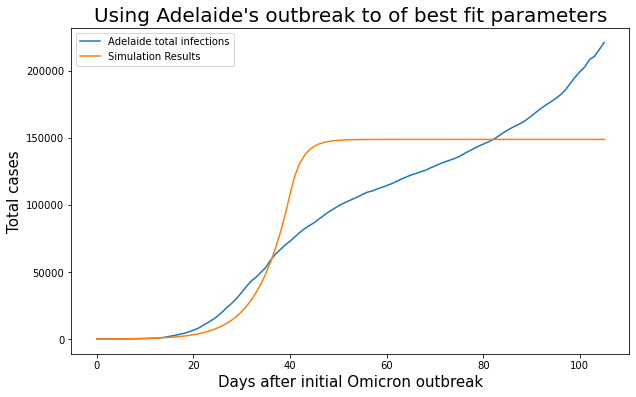

In [220]:
#plotting(y)
plt.figure(figsize = (10,6))
plt.plot(saht, label = 'Adelaide total infections')
plt.plot(day_infs, label = 'Simulation Results')
plt.ylabel('Total cases', size = 15)
plt.xlabel('Days after initial Omicron outbreak', size = 15)
plt.legend()
plt.title('Using Adelaide\'s outbreak to of best fit parameters', size =20)

In [203]:
cases = saht
len(day_infs) == len(saht)

True

In [204]:
def logfitting(day_infs,cases):
    log_day = []
    for i in day_infs:
        try:
            log_day.append(math.log(i))
        except:
            log_day.append(0)
            
    log_cas = []
    for i in cases:
        try:
            log_cas.append(math.log(i))
        except:
            log_cas.append(0)
            
    sme = 0
    try:
        for i in range(len(log_day)):
            sme += (log_day[i] - log_cas[i])**2
        return sme
    except OverflowError:
        return np.inf

In [214]:
alphas1 = [2.3+0.1*i for i in range(10)]
alphas2 = [0.01+0.1*i for i in range(10)]
alphas3 = [0.01+0.1*i for i in range(10)]
latents = [2+0.1*i for i in range(10)]
infectious = [3 +0.1*i for i in range(10)]

SME = []
for a1 in alphas1:
    print(a1)
    for a2 in alphas2:
        for a3 in alphas3:
        # [alpha, beta, gamma]
            for L in latents:
                for D in infectious:
                    if D > L:
                        params = [a1, 1/L, 1/(D-L)]
                        y, day_infs = dynamics(x_init,days, params,steps,a1,a2,a3,uptakes,effic)

                        SME.append([(a1,a2,a3,L,D),logfitting(day_infs,cases)])


2.3
2.4
2.5
2.5999999999999996
2.6999999999999997
2.8
2.9
3.0
3.0999999999999996
3.1999999999999997


In [215]:
allDone()

In [216]:
scores = list(zip(*SME))[1]
scores.index(min(scores))

90051

In [218]:
SME[90051]

[(3.1999999999999997, 0.01, 0.01, 2.5, 3.1), 17.13916304753161]